In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
def prior(mu):
    return np.ones(len(mu))

def verosimilitud(x,mu,sigma):
    norm = 1/(2*np.pi*sigma**2)**(1/2)
    return np.exp(-(x-mu)**2/(2*sigma**2))*norm

def mu_sigma(x_k,sigma_k):
    w_k = sigma_k**-2
    mu = np.sum(x_k*w_k)/np.sum(w_k)
    sigma = np.sum(w_k)
    return mu,sigma

In [34]:
mu = np.linspace(-20,20,1000)
#x_k = np.linspace(-10,15,10)
x_k = np.random.normal(loc=7,scale=2,size=20)
sigma_k = np.linspace(1E-3,2,len(x_k))

# Método 'manual' ---------------------------------------------
log_V = np.zeros(len(mu))
for i in range(len(x_k)):
    log_V += np.log(verosimilitud(x_k[i],mu,sigma_k[i]))
    #print(V_i)

log_pos = np.log(prior(mu))+log_V
log_evidencia = np.amax(log_pos)
log_pos = log_pos-log_evidencia
posterior = np.exp(log_pos)
posterior = posterior/np.trapz(posterior,mu)

cero = np.argmax(posterior)
mu_0 = mu[cero]
d2 = (log_pos[cero+1] - 2*log_pos[cero] + log_pos[cero-1]) / ((mu[1]-mu[0])**2)
sigma_0 = (-d2)**(-1/2)

# Método directo
mu_0,sigma_0 = mu_sigma(x_k,sigma_k)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


Text(0.5, 1.0, '$\\mu$ = 5.69 $\\pm$ 20.01')

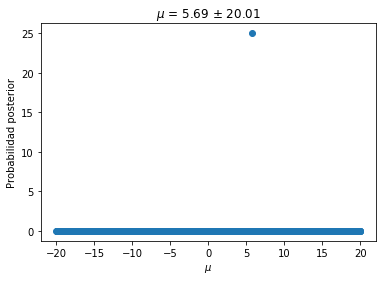

In [35]:
plt.figure()
plt.scatter(mu,posterior)
plt.xlabel(r'$\mu$'.format())
plt.ylabel('Probabilidad posterior')
plt.title(r'$\mu$ = {:.2f} $\pm$ {:.2f}'.format(mu_0,sigma_0))